In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings
warnings.simplefilter("ignore")

In [26]:
df = pd.read_csv("find_wavelength.csv", decimal=',')
df

,Wavelength,empty,A5_H2O,A4_bca_500,E5_bca_16x,G5_bca_64x,Н20 - empty
0,200,2.092,2.205,2.700,2.527,2.451,0.113
1,205,1.313,1.509,2.775,2.669,2.569,0.196
2,210,0.558,0.844,2.832,2.640,2.557,0.286
3,215,0.287,0.519,2.864,2.652,2.574,0.232
4,220,0.185,0.383,2.941,2.749,2.646,0.198
5,225,0.134,0.292,3.115,2.900,2.744,0.158
6,230,0.111,0.225,3.436,3.228,2.500,0.114
7,235,0.094,0.165,3.270,2.999,1.364,0.071
8,240,0.080,0.118,3.254,1.577,0.571,0.038
9,245,0.071,0.094,3.317,0.858,0.307,0.023


#### 1. Спектр поглощения пустой лунки

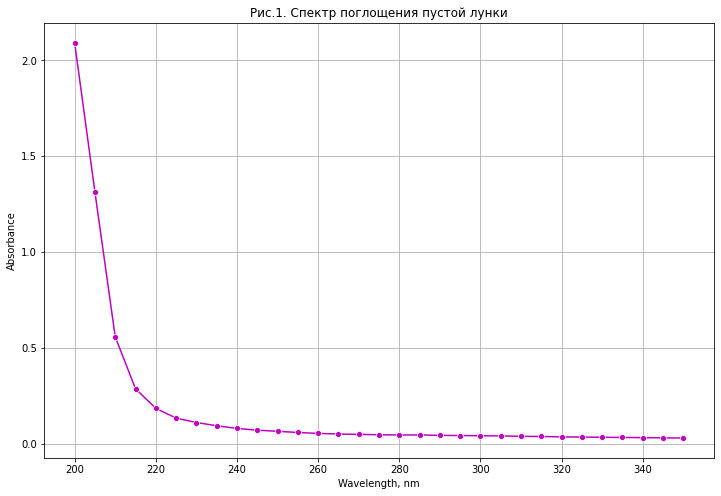

In [27]:
plt.figure(figsize = (12, 8))
sns.lineplot("Wavelength", "empty", data = df, 
             color = 'm', marker='o')
plt.ylabel("Absorbance")
plt.xlabel("Wavelength, nm")
plt.title("Рис.1. Спектр поглощения пустой лунки")
plt.grid();

#### 2. Исходный спектр поглощения воды

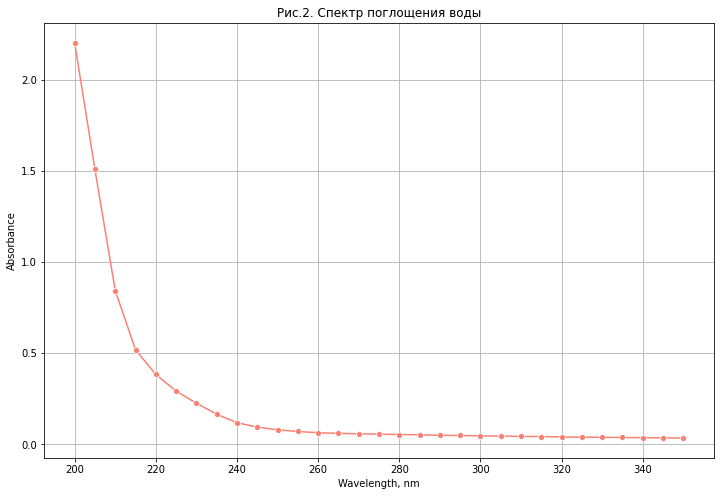

In [28]:
plt.figure(figsize = (12, 8))
sns.lineplot("Wavelength", "A5_H2O", data = df, 
             color = 'salmon', marker='o')
plt.ylabel("Absorbance")
plt.xlabel("Wavelength, nm")
plt.title("Рис.2. Спектр поглощения воды")
plt.grid();

#### 3. Скорректированный спектр поглощения воды

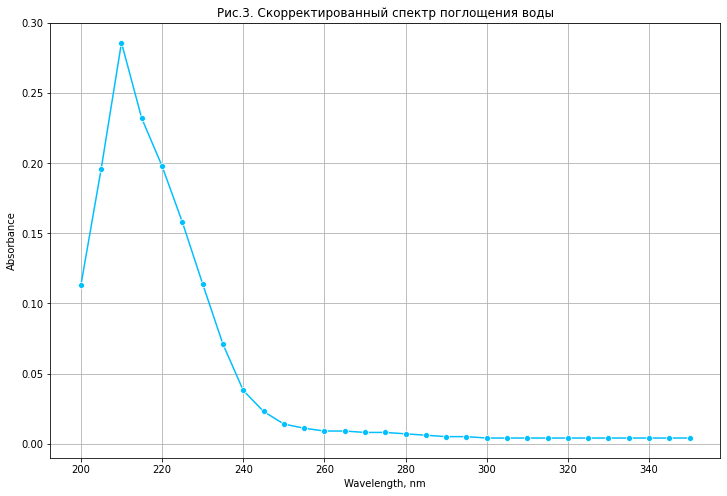

In [29]:
plt.figure(figsize = (12, 8))
sns.lineplot("Wavelength", "Н20 - empty", data = df, 
             color = 'deepskyblue', marker='o')
plt.ylabel("Absorbance")
plt.xlabel("Wavelength, nm")
plt.title("Рис.3. Скорректированный спектр поглощения воды")
plt.grid();

#### 4. Все полученные спектры БСА

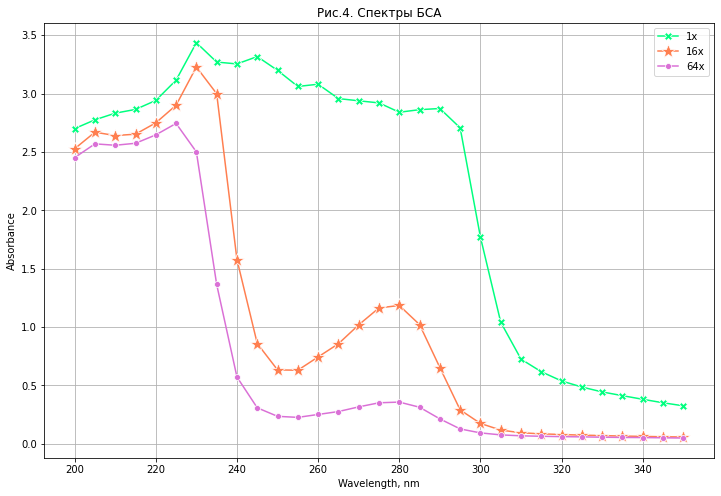

In [30]:
plt.figure(figsize = (12, 8))
sns.lineplot("Wavelength", "A4_bca_500", data = df, 
             color = 'springgreen', marker='X', markersize = 8, label = "1x")
sns.lineplot("Wavelength", "E5_bca_16x", data = df, 
             color = 'coral', marker='*', markersize = 14, label = "16x")
sns.lineplot("Wavelength", "G5_bca_64x", data = df, 
             color = 'orchid', marker='o', label = "64x")
plt.ylabel("Absorbance")
plt.xlabel("Wavelength, nm")
plt.title("Рис.4. Спектры БСА")
plt.grid();

#### 5. Зависимость поглощения от концентрации БСА (230, 280, 300 нм)

In [32]:
df2 = pd.read_csv("diff_conc_BSA.csv", index_col = 0, decimal=',')
table_230,table_280, table_300  = df2.iloc[:8], df2.iloc[8:16], df2.iloc[16:]
conc = [500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 3.90625]

In [33]:
def dependence(table, num, wave, color1, color2):
    mean_ = table.mean(axis=1)
    std_ = table.std(axis=1)
    left = mean_ - 1.96 * (std_ / np.sqrt(len(table)))
    right = mean_ + 1.96 * (std_ / np.sqrt(len(table)))

    
    table_stat = table.copy()
    table_stat["Mean"]  = mean_
    table_stat["left_border"], table_stat["right_border"] = left, right
    table_stat["Concentration"] = conc
    
    plt.figure(figsize = (12, 8))
    for i in range(8):
        plt.plot([conc[i], conc[i]], [left[i], right[i]], color = "grey")
    
    ax = sns.lineplot(x = "Concentration", y = "Mean", data = table_stat, color = color1)
    ax.scatter(conc, mean_, color = color2)
    ax.set_ylabel("Absorbance")
    ax.grid()
    ax.set_title(f"Рис.{num}. Зависимость поглощения от концентрации ({wave} нм)")
    
    table_stat.to_csv(f"len{wave}.csv", sep = '\t')

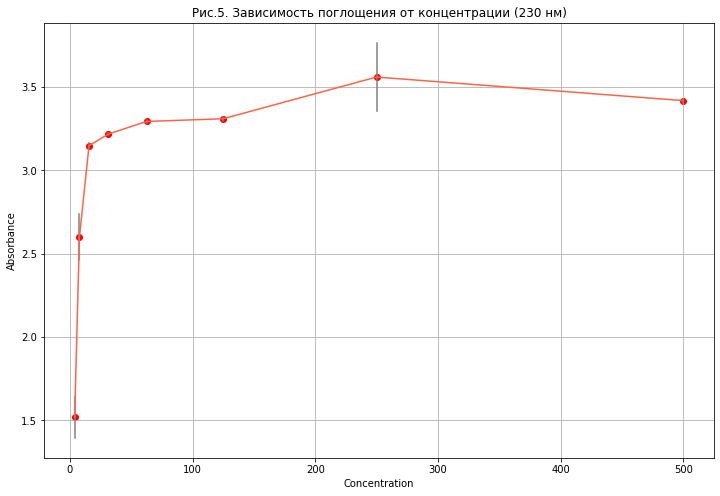

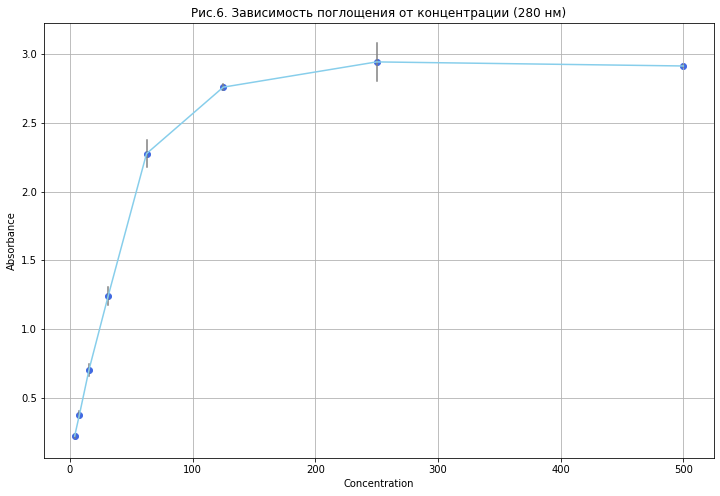

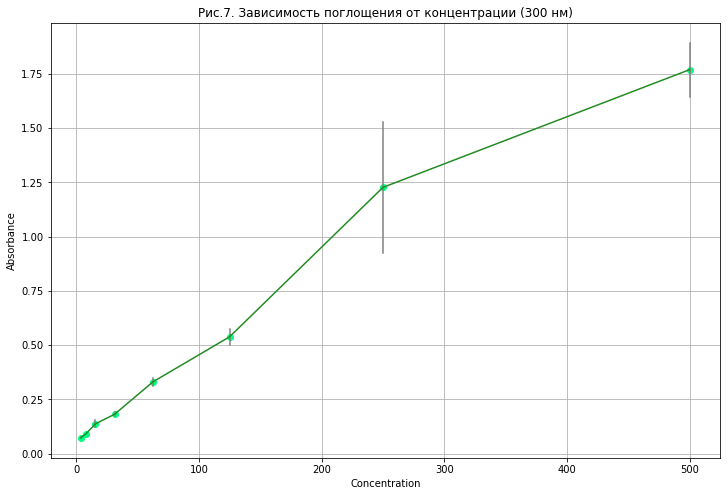

In [34]:
dependence(table_230, "5", "230", "tomato", "r")
dependence(table_280, "6", "280", "skyblue", "royalblue")
dependence(table_300, "7", "300", "forestgreen", "springgreen")

#### 6. Аппроксимация линейного участка прямой, определение коэффициентов прямой и их погрешности, рассчет коэффициента детерминации	

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
t230, t280, t300 = pd.read_csv("len230.csv", sep= '\t'), pd.read_csv("len280.csv", sep= '\t'), pd.read_csv("len300.csv", sep= '\t')
t230

,Unnamed: 0,first,second,third,Mean,left_border,right_border,Concentration
0,A_230,3.427,3.400,3.430,3.419000,3.407550,3.430450,500.00000
1,B_230,3.904,3.385,3.393,3.560667,3.354605,3.766728,250.00000
2,C_230,3.330,3.303,3.298,3.310333,3.298404,3.322262,125.00000
3,D_230,3.282,3.312,3.288,3.294000,3.283000,3.305000,62.50000
4,E_230,3.223,3.207,3.224,3.218000,3.211390,3.224610,31.25000
5,F_230,3.162,3.125,3.158,3.148333,3.134262,3.162405,15.62500
6,G_230,2.464,2.507,2.832,2.601000,2.461573,2.740427,7.81250
7,H_230,1.374,1.462,1.719,1.518333,1.394108,1.642558,3.90625


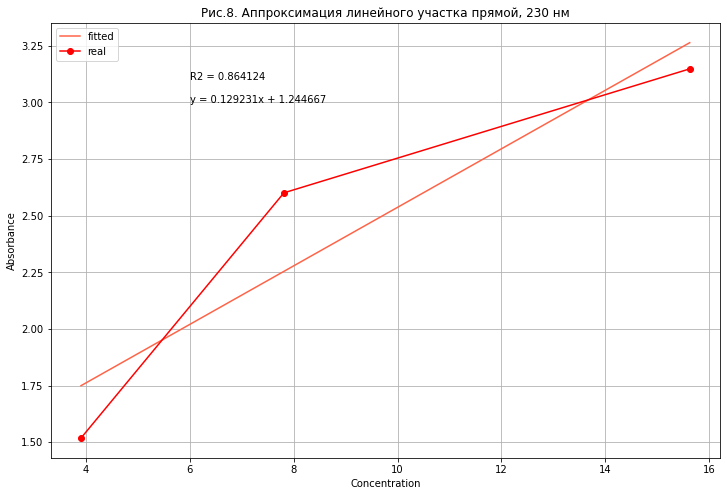

In [36]:
X = np.array(t230["Concentration"][-3:]).reshape(-1, 1)
y = np.array(t230["Mean"][-3:])
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
a, b = round(model.coef_[0], 6), round(model.intercept_, 6)
r2 = round(r2_score(y, y_pred), 6)

plt.figure(figsize = (12, 8))
plt.plot(X, y_pred, color = "tomato", label = "fitted")
plt.plot(X, y, color = "r", marker = "o", label = "real")
plt.text(6, 3.1, f"R2 = {r2}")
plt.text(6, 3, f"y = {a}x + {b}")

plt.title("Рис.8. Аппроксимация линейного участка прямой, 230 нм")
plt.xlabel("Concentration")
plt.ylabel("Absorbance")
plt.legend()
plt.grid();

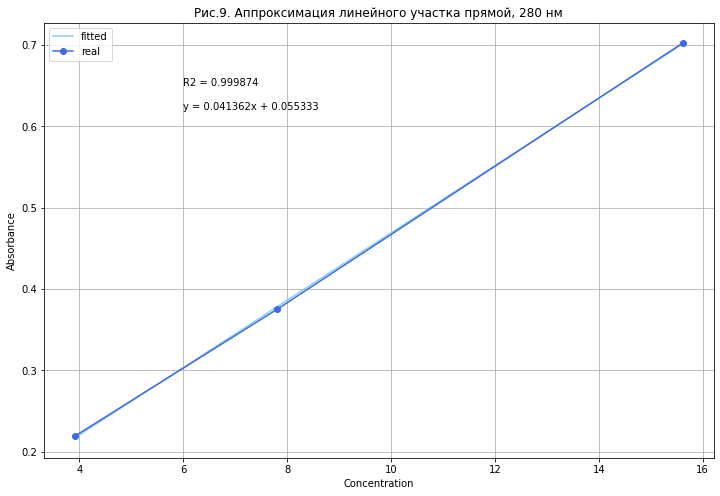

In [37]:
X = np.array(t280["Concentration"][-3:]).reshape(-1, 1)
y = np.array(t280["Mean"][-3:])
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
a, b = round(model.coef_[0], 6), round(model.intercept_, 6)
r2 = round(r2_score(y, y_pred), 6)

plt.figure(figsize = (12, 8))
plt.plot(X, y_pred, color = "skyblue", label = "fitted")
plt.plot(X, y, color = "royalblue", marker = "o", label = "real")
plt.text(6, 0.65, f"R2 = {r2}")
plt.text(6, 0.62, f"y = {a}x + {b}")

plt.title("Рис.9. Аппроксимация линейного участка прямой, 280 нм")
plt.xlabel("Concentration")
plt.ylabel("Absorbance")
plt.legend()
plt.grid();

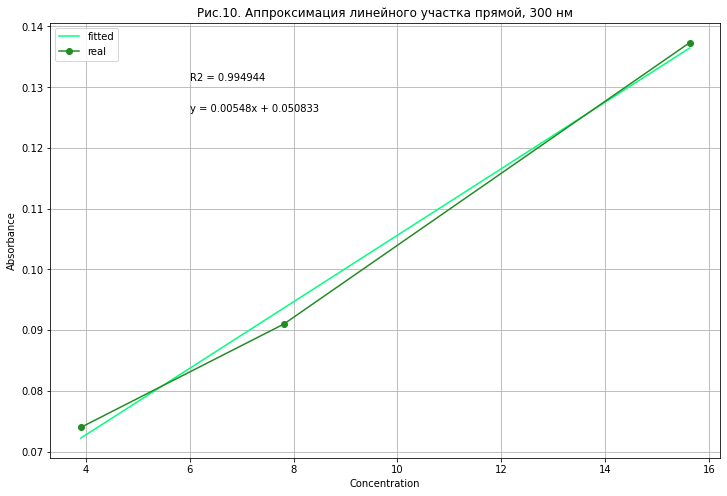

In [38]:
X = np.array(t300["Concentration"][-3:]).reshape(-1, 1)
y = np.array(t300["Mean"][-3:])
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
a, b = round(model.coef_[0], 6), round(model.intercept_, 6)
r2 = round(r2_score(y, y_pred), 6)

plt.figure(figsize = (12, 8))
plt.plot(X, y_pred, color = "springgreen", label = "fitted")
plt.plot(X, y, color = "forestgreen", marker = "o", label = "real")
plt.text(6, 0.131, f"R2 = {r2}")
plt.text(6, 0.126, f"y = {a}x + {b}")

plt.title("Рис.10. Аппроксимация линейного участка прямой, 300 нм")
plt.xlabel("Concentration")
plt.ylabel("Absorbance")
plt.legend()
plt.grid();